In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
dfs = []
for file in range(4,150):
    df_curr = pd.read_csv(f"ridge_data/data_{file}.csv", header=0, names = ['Set','File','PID','angular_velocity','Band','Radius_range'])
    dfs.append(df_curr)
df = pd.concat(dfs, ignore_index=True)

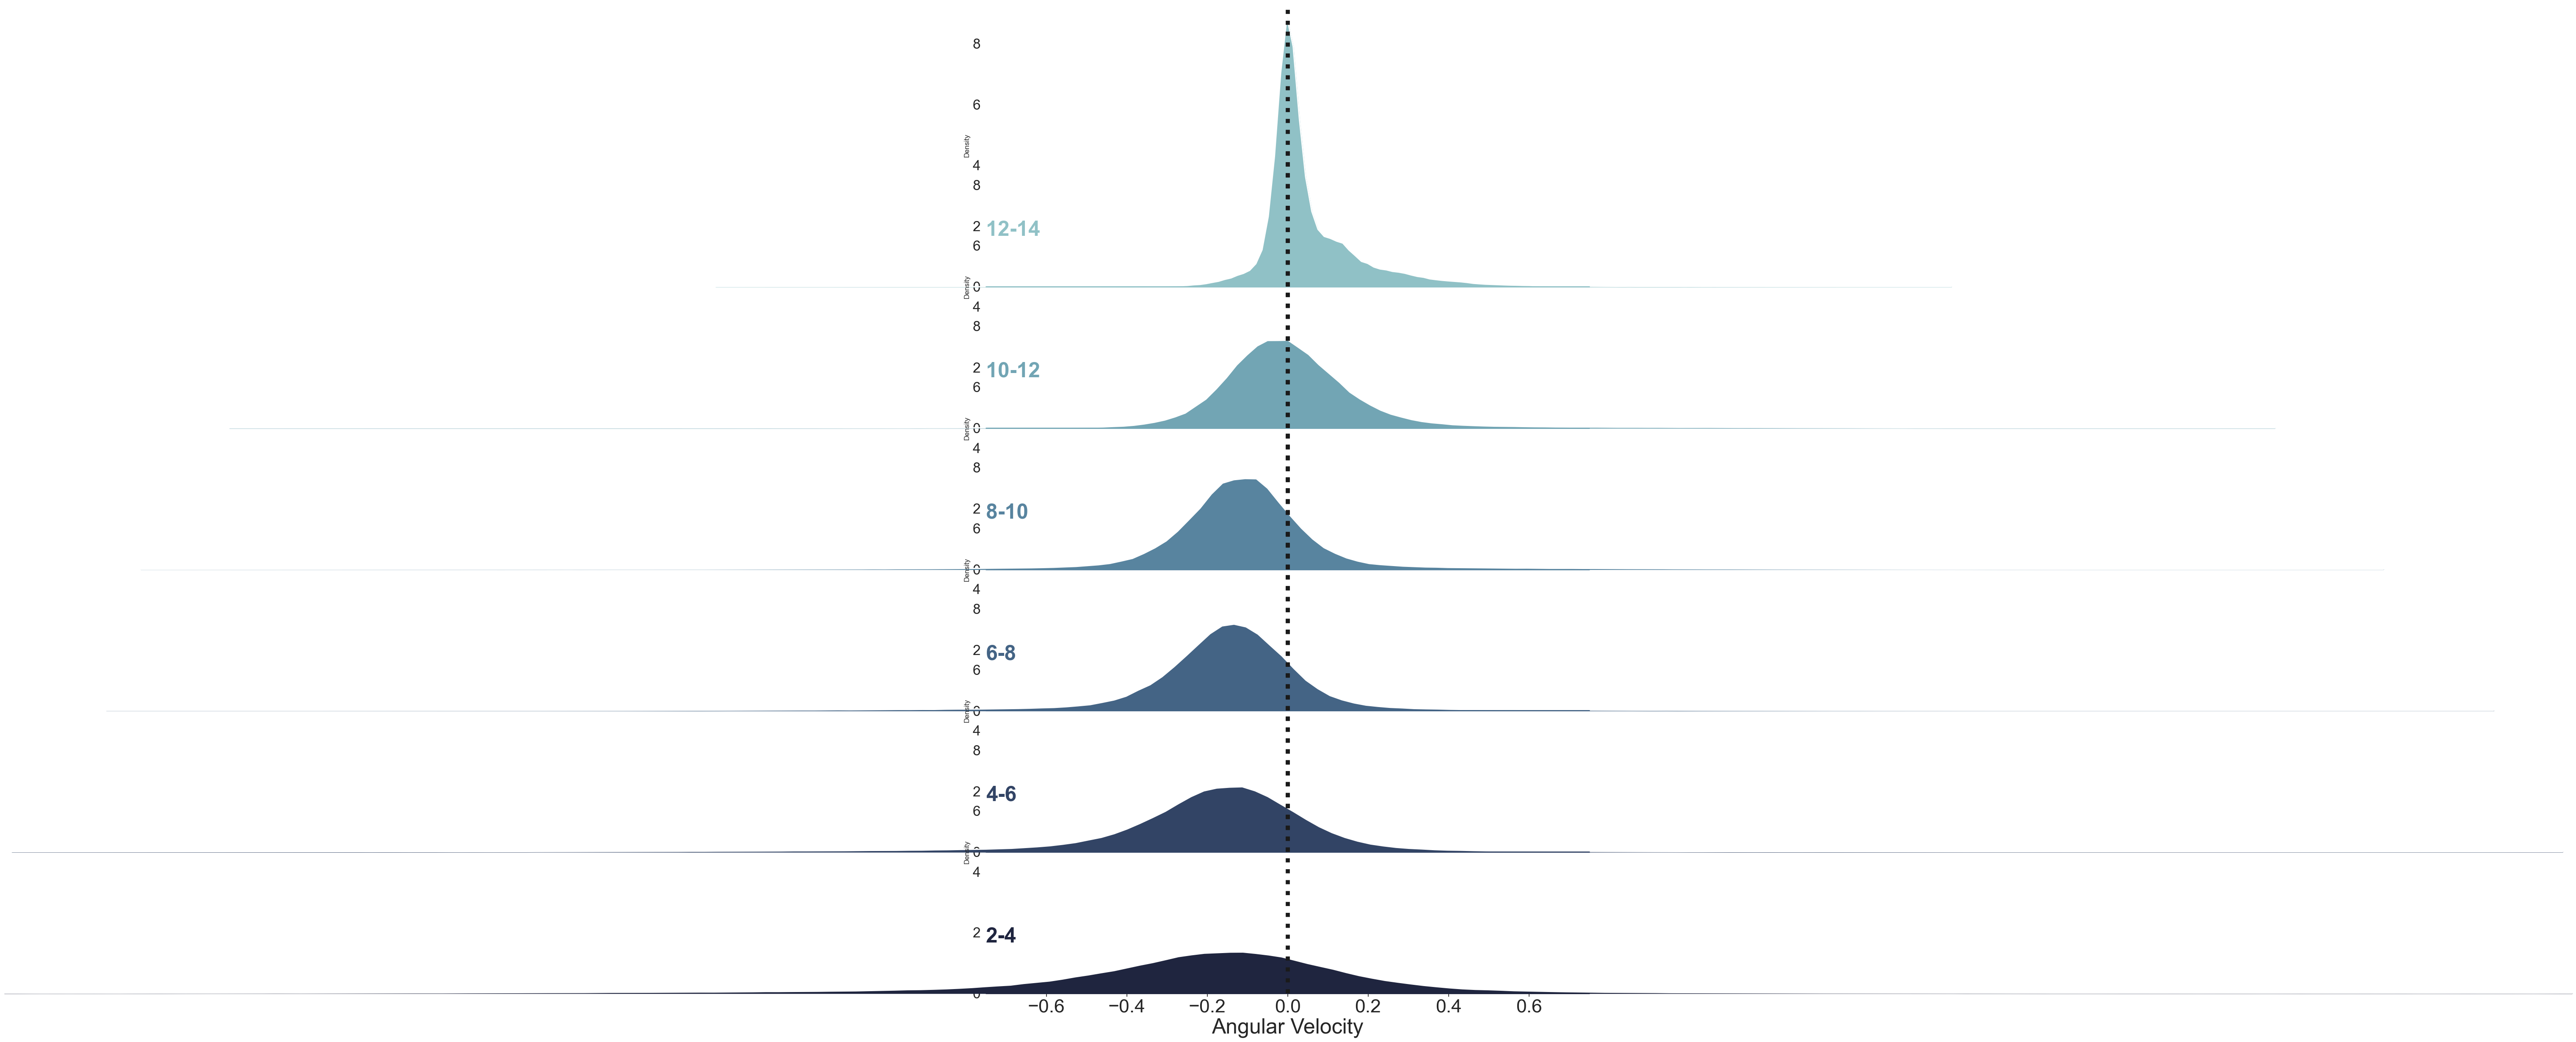

In [14]:
# set style
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Palette for the number of unique regions
num_regions = df['Radius_range'].nunique()
pal = sns.cubehelix_palette(num_regions, rot=-.25, light=.7)

plt.rcParams.update({'font.size': 36})   # desired font size

# Creating FacetGrid using 'Radius_range'
g = sns.FacetGrid(df, row="Radius_range", hue="Radius_range", aspect=10, height=3, palette=pal)

# densities
g.map(sns.kdeplot, "angular_velocity", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "angular_velocity", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Function - ridge with its region name
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label,  fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, "angular_velocity")

# subplots
g.figure.subplots_adjust(hspace=-0.50)
g.set_titles("")
for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=24)  # label size

g.despine(bottom=True, left=True)
g.figure.set_size_inches(15, 30)  # Figure size
plt.xlabel("Angular Velocity", fontsize=36)
plt.xlim(-0.75,0.75)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.xticks(fontsize=32)
plt.xlabel("Angular Velocity", fontsize=36)
g.figure.subplots_adjust(bottom=0.18)

#To plot a vertical line at x=0 for all subplots
for ax in g.axes.flat:
    ax.axvline(x=0.0, color='k', linestyle=':', linewidth=7, zorder=10)
plt.savefig("Ridgeplot_ang_vel_dist_band_size_2.png",dpi=600)